Lab 2
Filip Chrapla,
406161

In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 -  Generated Quantities Block

In [2]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:compiling stan file /root/lab2nowy/code_1.stan to exe file /root/lab2nowy/code_1
INFO:cmdstanpy:compiled model executable: /root/lab2nowy/code_1


In [3]:
samples = gen_quant.sample(data={'M':10}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [4]:
#Ramka danych
df = pd.DataFrame(samples.stan_variable('y_sim'))

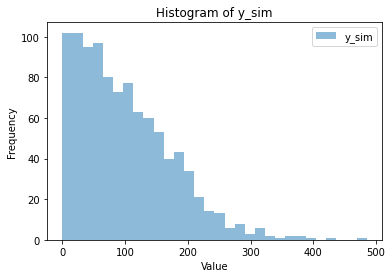

In [6]:
#Histogram y_sim
plt.hist(df[0], bins=30, alpha=0.5, label='y_sim')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of y_sim')
plt.legend()
plt.show()

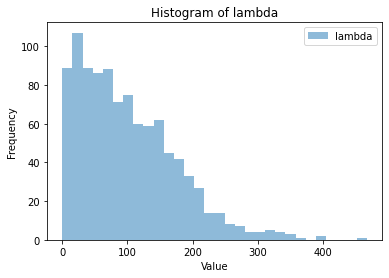

In [8]:
#Histogram lambda
# Narysuj histogram dla lambda
plt.hist(samples.stan_variable('lambda'), bins=30, alpha=0.5, label='lambda')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of lambda')
plt.legend()
plt.show()


## Excercise 2 - Constraints on the data 

In [9]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:compiling stan file /root/lab2nowy/code_2.stan to exe file /root/lab2nowy/code_2
INFO:cmdstanpy:compiled model executable: /root/lab2nowy/code_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


[0 1]


In [18]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [19]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:compiling stan file /root/lab2nowy/code_4.stan to exe file /root/lab2nowy/code_4


INFO:cmdstanpy:compiled model executable: /root/lab2nowy/code_4
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Iteration:  100 / 7000 [  1%]  (Warmup)


chain 1 |▊         | 00:00 Iteration:  400 / 7000 [  5%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  700 / 7000 [ 10%]  (Warmup)


chain 1 |█▋        | 00:00 Iteration: 1000 / 7000 [ 14%]  (Warmup)


chain 1 |██        | 00:00 Iteration: 1200 / 7000 [ 17%]  (Sampling)



chain 1 |██▌       | 00:00 Iteration: 1500 / 7000 [ 21%]  (Sampling)


chain 1 |██▉       | 00:01 Iteration: 1800 / 7000 [ 25%]  (Sampling)


chain 1 |███▏      | 00:01 Iteration: 2000 / 7000 [ 28%]  (Sampling)


chain 1 |███▍      | 00:01 Iteration: 2200 / 7000 [ 31%]  (Sampling)
chain 1 |████      | 00:01 Iteration: 2600 / 7000 [ 37%]  (Sampling)




chain 1 |████▍     | 00:01 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |████▊     | 00:01 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 1 |█████▎

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /root/lab2nowy/samples/code_4-20240403152918_1.csv, /root/lab2nowy/samples/code_4-20240403152918_2.csv, /root/lab2nowy/samples/code_4-20240403152918_3.csv, /root/lab2nowy/samples/code_4-20240403152918_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

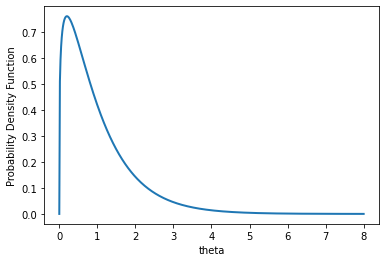

In [20]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [21]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /root/lab2nowy/code_5.stan to exe file /root/lab2nowy/code_5
INFO:cmdstanpy:compiled model executable: /root/lab2nowy/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▏    | 00:00 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /root/lab2nowy/samples/code_5-20240403153333_1.csv, /root/lab2nowy/samples/code_5-20240403153333_2.csv, /root/lab2nowy/samples/code_5-20240403153333_3.csv, /root/lab2nowy/samples/code_5-20240403153333_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

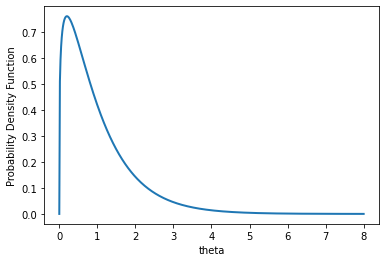

In [22]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [5]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 5 # number of letters in the first name
L = 7 # number of letters in the last name
y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:compiling stan file /root/lab2nowy/code_6.stan to exe file /root/lab2nowy/code_6
INFO:cmdstanpy:compiled model executable: /root/lab2nowy/code_6
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 StatusERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Command and output files:
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/root/lab2nowy/code_6', 'id=1', 'random', 'seed=6018', 'data', 'file=/tmp/tmppn8y7d9s/olye_1pj.json', 'output', 'file=/tmp/tmppn8y7d9s/code_6-20240403212314.csv', 'method=sample', 'num_samples=1', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmppn8y7d9s/code_6-20240403212314.csv
 console_msgs (if any):
	/tmp/tmppn8y7d9s/code_6-20240403212314_0-stdout.txt

## Excercise 5 - different methods of defining models


In [9]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 21012001#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiling stan file /root/lab2nowy/code_9.stan to exe file /root/lab2nowy/code_9
INFO:cmdstanpy:compiled model executable: /root/lab2nowy/code_9
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


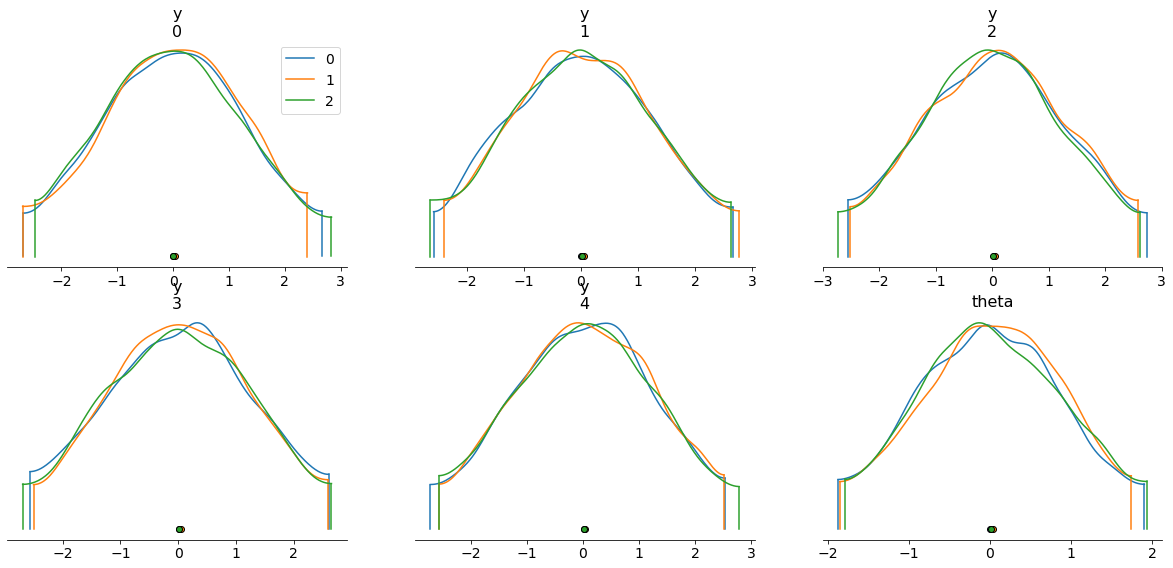

In [10]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [13]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample = result_1)

mean_y_samples = mean_of_y.stan_variable('mean_y')



INFO:cmdstanpy:compiling stan file /root/lab2nowy/code_10.stan to exe file /root/lab2nowy/code_10


INFO:cmdstanpy:compiled model executable: /root/lab2nowy/code_10
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing


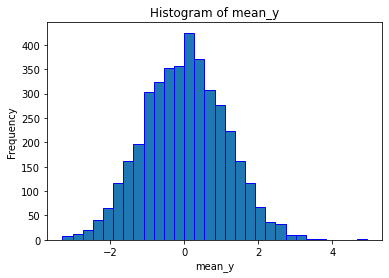

In [14]:
plt.hist(mean_y_samples, bins=30, edgecolor='blue')
plt.xlabel('mean_y')
plt.ylabel('Frequency')
plt.title('Histogram of mean_y')
plt.show()